In [1]:
!pip install sunpy[all] lime

from IPython.display import clear_output
clear_output()

In [2]:
import numpy as np
import pandas as pd

In [3]:
positive = pd.read_csv('positive2023.csv')
positive["CME"] = 1
negative = pd.read_csv('negative2023.csv')
negative["CME"] = 0

In [4]:
data = pd.concat([positive, negative], ignore_index=True)

In [5]:
data

,Unnamed: 0,USFLUX,MEANGBT,MEANJZH,MEANPOT,SHRGT45,TOTUSJH,MEANGBH,MEANALP,MEANGAM,...,TOTPOT,MEANSHR,AREA_ACR,R_VALUE,ABSNJZH,HARPNUM,NOAA,Class,Peak Time,CME
0,0,2.246101e+22,107.736,0.021724,15533.100,54.882,2975.118,77.983,0.041413,59.541,...,7.077275e+23,50.329,945.314636,4.805,745.287,377,11158,X2.2,2011.02.14_01:56_TAI,1
1,1,2.235615e+22,93.863,-0.001943,10914.060,44.178,1636.710,56.639,-0.003942,50.680,...,4.733711e+23,43.479,961.502686,4.303,63.441,401,11166,M2.0,2011.03.06_14:30_TAI,1
2,2,6.039302e+22,91.233,0.007535,9912.353,29.044,4229.148,49.560,0.015028,41.150,...,1.074422e+24,35.873,1934.446167,4.865,615.008,393,11164,M3.7,2011.03.06_20:12_TAI,1
3,3,2.384940e+22,109.706,0.009620,3703.910,13.500,1505.331,47.602,0.030907,34.321,...,1.879337e+23,28.525,970.551636,3.971,367.530,637,11226,M2.5,2011.06.06_06:41_TAI,1
4,4,1.989983e+22,109.891,0.032849,12062.610,44.090,2547.054,73.681,0.079865,53.270,...,5.269515e+23,43.929,1259.099854,4.777,1080.528,750,11261,M6.0,2011.08.02_13:48_TAI,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557,395,2.140433e+22,120.438,0.002105,5611.069,28.628,1870.150,60.663,0.006057,44.930,...,2.722422e+23,35.823,1356.139404,4.279,76.915,9857,13380,M1.4,2023.07.28_16:24_TAI,0
558,396,3.171139e+22,116.735,-0.007334,9390.776,35.039,2884.195,70.360,-0.016329,47.107,...,5.764891e+23,39.608,1775.009399,4.650,339.016,9857,13380,M2.2,2023.07.31_04:47_TAI,0
559,397,4.077083e+22,109.347,-0.008489,9451.693,33.379,3719.914,62.331,-0.019217,45.551,...,7.593245e+23,38.481,2012.830688,4.974,513.506,9857,13380,M1.4,2023.07.31_14:09_TAI,0
560,398,5.430287e+22,99.029,-0.011452,9868.051,28.932,4697.934,53.649,-0.023844,42.053,...,9.912650e+23,36.118,2082.468750,5.014,866.194,9857,13380,M1.7,2023.08.01_14:52_TAI,0


## Plotting histograms to see the variability of the data

In [6]:
data = data.drop(['Unnamed: 0','HARPNUM','NOAA','Class','Peak Time'], axis=1)

In [7]:
X = data.drop(columns=['CME'])
y = data['CME']

In [8]:
from sklearn.preprocessing import MinMaxScaler

def normalize_the_data(data):
    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(data)
    return normalized_data

xn = normalize_the_data(X)

In [9]:
columns = ['USFLUX', 'MEANGBT', 'MEANJZH', 'MEANPOT', 'SHRGT45', 'TOTUSJH',
       'MEANGBH', 'MEANALP', 'MEANGAM', 'MEANGBZ', 'MEANJZD', 'TOTUSJZ',
       'SAVNCPP', 'TOTPOT', 'MEANSHR', 'AREA_ACR', 'R_VALUE', 'ABSNJZH','CME']

df = pd.concat([pd.DataFrame(xn), pd.DataFrame(y)], axis=1)
df.columns = columns

df

,USFLUX,MEANGBT,MEANJZH,MEANPOT,SHRGT45,TOTUSJH,MEANGBH,MEANALP,MEANGAM,MEANGBZ,MEANJZD,TOTUSJZ,SAVNCPP,TOTPOT,MEANSHR,AREA_ACR,R_VALUE,ABSNJZH,CME
0,0.110342,0.561371,0.690394,0.605487,0.871939,0.204824,0.753790,0.678962,0.937815,0.588089,0.485318,0.202952,0.118421,0.133011,0.900055,0.128267,0.875866,0.193786,1
1,0.109806,0.406908,0.507880,0.415653,0.699841,0.109642,0.451634,0.462796,0.712539,0.386897,0.506505,0.132131,0.033120,0.088537,0.712075,0.130544,0.784360,0.016239,1
2,0.304362,0.377625,0.580972,0.374485,0.456517,0.294006,0.351421,0.553205,0.470255,0.396149,0.289121,0.311960,0.342892,0.202599,0.503348,0.267394,0.886803,0.159862,1
3,0.117444,0.583305,0.597047,0.119330,0.206602,0.100299,0.323702,0.628887,0.296639,0.515527,0.401939,0.123382,0.194100,0.034370,0.301701,0.131817,0.723843,0.095421,1
4,0.097242,0.585365,0.776187,0.462856,0.698426,0.174382,0.692889,0.862225,0.778385,0.569345,0.665822,0.172255,0.447773,0.098705,0.724424,0.172403,0.870762,0.281080,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557,0.104937,0.702797,0.539097,0.197710,0.449829,0.126244,0.508600,0.510449,0.566355,0.648451,0.678683,0.157334,0.061637,0.050369,0.501976,0.186052,0.779985,0.019747,0
558,0.157658,0.661567,0.466299,0.353049,0.552904,0.198358,0.645876,0.403758,0.621701,0.607707,0.507569,0.226011,0.168830,0.108106,0.605845,0.244969,0.847612,0.087996,0
559,0.203996,0.579308,0.457397,0.355553,0.526215,0.257791,0.532213,0.389994,0.582143,0.595550,0.400374,0.279435,0.127432,0.142803,0.574918,0.278420,0.906672,0.133432,0
560,0.273212,0.464426,0.434547,0.372664,0.454716,0.327344,0.409306,0.367939,0.493212,0.500956,0.333803,0.317297,0.310307,0.186818,0.510071,0.288215,0.913963,0.225269,0


In [10]:
pos = df[df['CME'] == 1]
neg = df[df['CME'] == 0]

## ANALYSIS

In [11]:
from sklearn.feature_selection import f_classif
from sklearn.datasets import make_classification

X = df.drop(columns=['CME'])
y = df['CME']

from sklearn.feature_selection import SelectKBest, f_classif

N_features = 18
a = np.array(X)
b = np.array(y)

selector = SelectKBest(f_classif, k=N_features)
selector.fit(a,b)
scores = selector.scores_
print(scores)



[ 7.68527459  0.16427655  5.76591166  8.63046187  3.02766277 14.81548447
  9.81849662  7.97104414  3.85462714  2.17304081  5.25972444 12.88699797
  1.44917842 12.32491386  3.13948892  9.8498248   5.40383189  0.27427629]


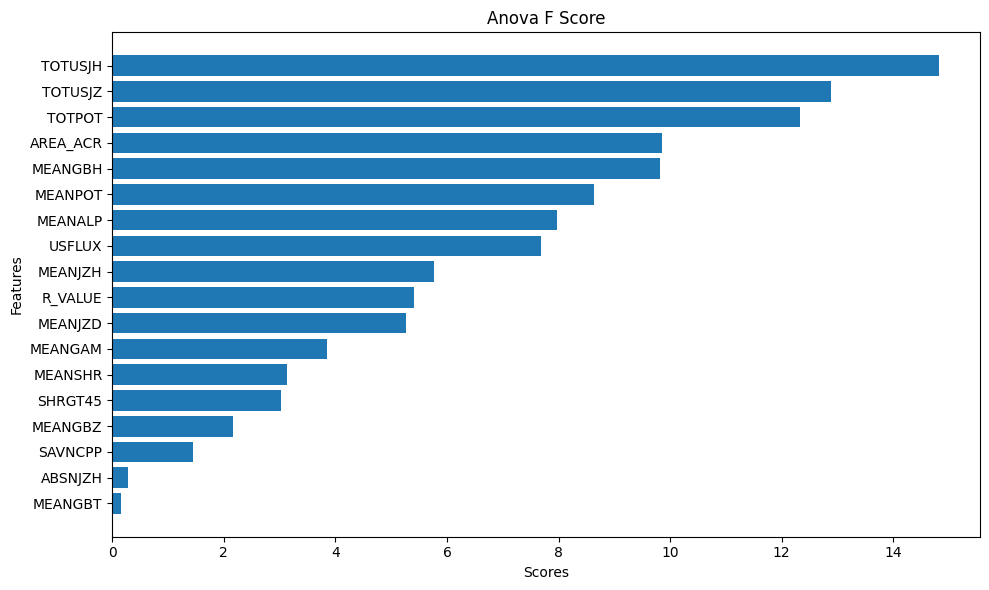

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

feature_names = X.columns
scores_df = pd.DataFrame({'Feature': feature_names, 'Score': scores}).sort_values('Score', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(scores_df['Feature'], scores_df['Score'])
plt.xlabel('Scores')
plt.ylabel('Features')
plt.title('Anova F Score')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

ordered_features = scores_df['Feature'].tolist()
ordered_features.append("CME")

In [13]:
df_reordered = df.loc[:, ordered_features]

In [14]:
df_reordered

,TOTUSJH,TOTUSJZ,TOTPOT,AREA_ACR,MEANGBH,MEANPOT,MEANALP,USFLUX,MEANJZH,R_VALUE,MEANJZD,MEANGAM,MEANSHR,SHRGT45,MEANGBZ,SAVNCPP,ABSNJZH,MEANGBT,CME
0,0.204824,0.202952,0.133011,0.128267,0.753790,0.605487,0.678962,0.110342,0.690394,0.875866,0.485318,0.937815,0.900055,0.871939,0.588089,0.118421,0.193786,0.561371,1
1,0.109642,0.132131,0.088537,0.130544,0.451634,0.415653,0.462796,0.109806,0.507880,0.784360,0.506505,0.712539,0.712075,0.699841,0.386897,0.033120,0.016239,0.406908,1
2,0.294006,0.311960,0.202599,0.267394,0.351421,0.374485,0.553205,0.304362,0.580972,0.886803,0.289121,0.470255,0.503348,0.456517,0.396149,0.342892,0.159862,0.377625,1
3,0.100299,0.123382,0.034370,0.131817,0.323702,0.119330,0.628887,0.117444,0.597047,0.723843,0.401939,0.296639,0.301701,0.206602,0.515527,0.194100,0.095421,0.583305,1
4,0.174382,0.172255,0.098705,0.172403,0.692889,0.462856,0.862225,0.097242,0.776187,0.870762,0.665822,0.778385,0.724424,0.698426,0.569345,0.447773,0.281080,0.585365,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557,0.126244,0.157334,0.050369,0.186052,0.508600,0.197710,0.510449,0.104937,0.539097,0.779985,0.678683,0.566355,0.501976,0.449829,0.648451,0.061637,0.019747,0.702797,0
558,0.198358,0.226011,0.108106,0.244969,0.645876,0.353049,0.403758,0.157658,0.466299,0.847612,0.507569,0.621701,0.605845,0.552904,0.607707,0.168830,0.087996,0.661567,0
559,0.257791,0.279435,0.142803,0.278420,0.532213,0.355553,0.389994,0.203996,0.457397,0.906672,0.400374,0.582143,0.574918,0.526215,0.595550,0.127432,0.133432,0.579308,0
560,0.327344,0.317297,0.186818,0.288215,0.409306,0.372664,0.367939,0.273212,0.434547,0.913963,0.333803,0.493212,0.510071,0.454716,0.500956,0.310307,0.225269,0.464426,0


In [15]:
pos = df_reordered[df_reordered['CME'] == 1]
neg = df_reordered[df_reordered['CME'] == 0]

In [16]:
min_a = pos.index.min()
max_a = pos.index.max()

pos['normalized_event_number'] = (pos.index - min_a) / (max_a - min_a)

min_b = neg.index.min()
max_b = neg.index.max()

neg['normalized_event_number'] = (neg.index - min_b) / (max_b - min_b)

/tmp/ipykernel_62344/2878712047.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos['normalized_event_number'] = (pos.index - min_a) / (max_a - min_a)
/tmp/ipykernel_62344/2878712047.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neg['normalized_event_number'] = (neg.index - min_b) / (max_b - min_b)


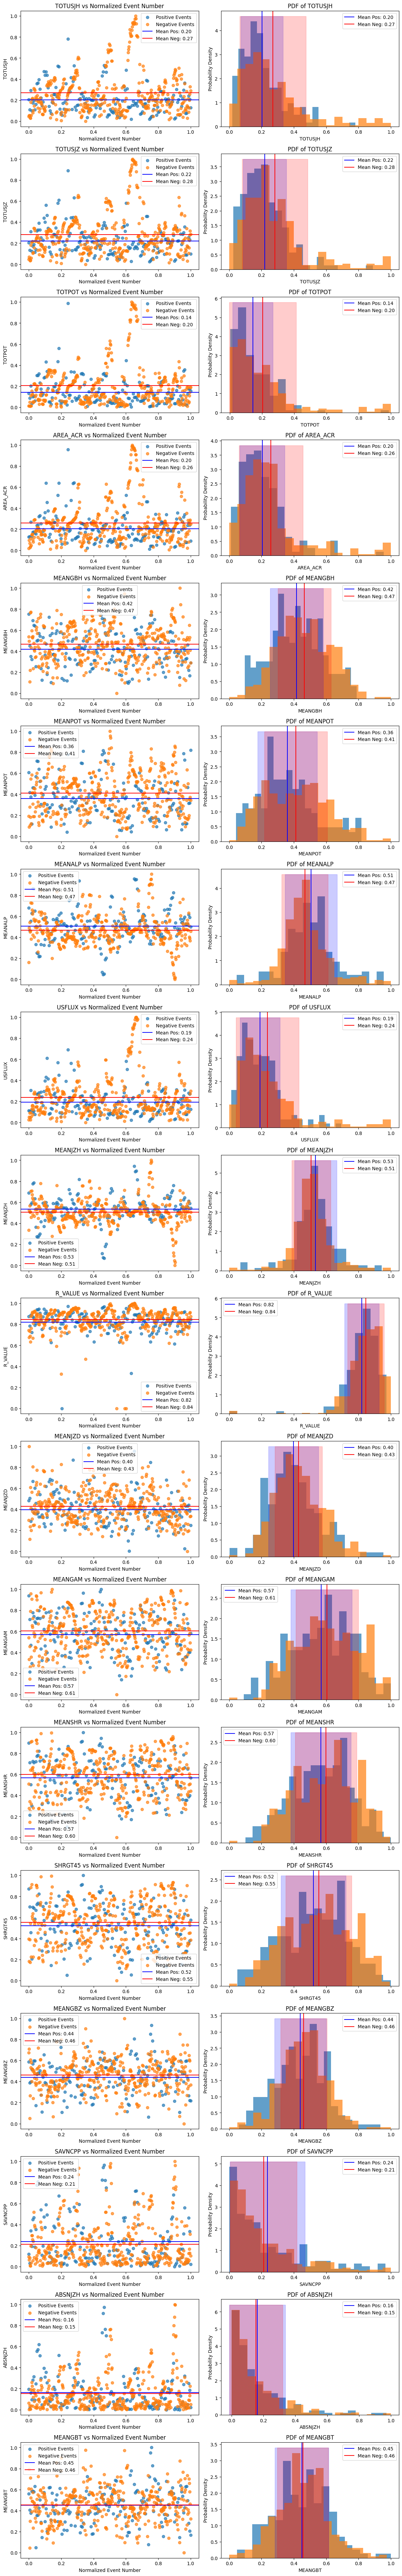

In [17]:
import numpy as np
import matplotlib.pyplot as plt

a = 1
plt.figure(figsize=(12, 80))

for i in range(len(columns) - 1):
    mean_pos = np.mean(pos.iloc[:, i])
    mean_neg = np.mean(neg.iloc[:, i])
    std_pos = np.std(pos.iloc[:,i])
    std_neg = np.std(neg.iloc[:,i])

    plt.subplot(len(columns), 2, a)
    plt.scatter(pos["normalized_event_number"], pos.iloc[:, i], alpha=0.7, label="Positive Events")
    plt.scatter(neg["normalized_event_number"], neg.iloc[:, i], alpha=0.7, label="Negative Events")
    plt.axhline(mean_pos, color='b', label=f"Mean Pos: {mean_pos:.2f}")
    plt.axhline(mean_neg, color='r', label=f"Mean Neg: {mean_neg:.2f}")
    plt.xlabel("Normalized Event Number")
    plt.ylabel(ordered_features[i])
    plt.title(f"{ordered_features[i]} vs Normalized Event Number")
    plt.legend()

    plt.subplot(len(columns), 2, a + 1)
    plt.hist(pos.iloc[:, i], bins=20, density=True, alpha=0.7)
    plt.hist(neg.iloc[:, i], bins=20, density=True, alpha=0.7)
    plt.axvline(mean_pos, color='b', label=f"Mean Pos: {mean_pos:.2f}")
    plt.axvline(mean_neg, color='r', label=f"Mean Neg: {mean_neg:.2f}")
    ymin, ymax = plt.ylim()
    plt.fill_betweenx([ymin, ymax], mean_pos - std_pos, mean_pos + std_pos, color='b', alpha=0.2)
    plt.fill_betweenx([ymin, ymax], mean_neg - std_neg, mean_neg + std_neg, color='r', alpha=0.2)
    plt.xlabel(ordered_features[i])
    plt.ylabel('Probability Density')
    plt.title(f'PDF of {ordered_features[i]}')
    plt.legend()

    a += 2

plt.tight_layout()
plt.savefig("2023_parameters_pdf.jpeg")
plt.show()